<a href="https://colab.research.google.com/github/RahulNalimeedi/Week-1/blob/main/Retail_Sales_Forecasting_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving DATASET.zip to DATASET.zip


In [3]:
import zipfile

with zipfile.ZipFile("DATASET.zip", 'r') as zip_ref:
    zip_ref.extractall("DATASET")  # Extracts into a folder named DATASET

##  Load and Explore the Data  
We'll read the extracted CSV files and prepare the data for modeling.

In [4]:
import pandas as pd

train = pd.read_csv("DATASET/train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
# Convert to datetime and extract time features
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week
train['IsHoliday'] = train['IsHoliday'].astype(int)
train.drop('Date', axis=1, inplace=True)
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,Week
0,1,1,24924.50,0,2010,2,5
1,1,1,46039.49,1,2010,2,6
2,1,1,41595.55,0,2010,2,7
3,1,1,19403.54,0,2010,2,8
4,1,1,21827.90,0,2010,3,9


## Sales Trends Visualization
Let’s explore seasonal sales patterns and holiday impact.

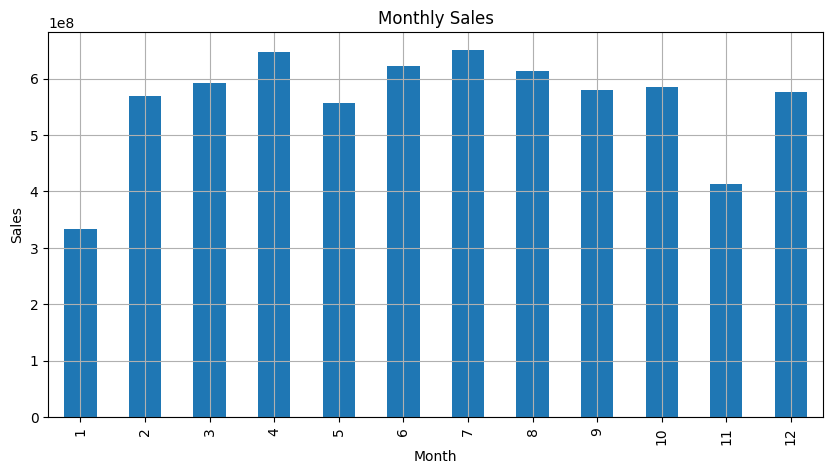

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
train.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar', title='Monthly Sales')
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()

##  Building a Regression Model
We’ll use Random Forest Regressor to predict Weekly Sales

In [8]:
from sklearn.model_selection import train_test_split

X = train[['Store', 'Dept', 'Year', 'Month', 'Week', 'IsHoliday']]
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 1431.76
RMSE: 4011.00


In [11]:
# Example prediction for Store 1, Dept 1 in November
sample = pd.DataFrame({
    'Store': [1],
    'Dept': [1],
    'Year': [2012],
    'Month': [11],
    'Week': [45],
    'IsHoliday': [1]
})

pred = model.predict(sample)
print(f"Predicted Weekly Sales: ${pred[0]:.2f}")

Predicted Weekly Sales: $19273.31


## Conclusion
- We successfully built a retail sales forecasting model.
- Used Random Forest on engineered features from time/date and store info.
- Model can be used to plan inventory, schedule promotions, and manage resources.

**MAE and RMSE indicate the average and root mean errors in weekly sales prediction.**